# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [50]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
%matplotlib inline
style.use('ggplot')
sns.set(style='darkgrid',color_codes=True)

# Importing the Machine learning packages
import statsmodels
import statsmodels.api as sm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


A SHORT DESCRIPTION OF THE FEATURES OF THE DATASET.

instant - record index

dteday - date

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

yr - year (0: 2018, 1:2019)

mnth - month ( 1 to 12)

holiday - whether the day is considered a holiday or not

weekday - day of the week

workingday - whether the day is neither a weekend nor holiday

weathersit -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, 
Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

hum - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

cnt - number of total rentals

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# To see the column names of a dataset
df.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.season.value_counts()

# from the data we can see that the count for fall & winter season is less when compared to other seasons
# therefore we can say that weather is significant in predicting the demand for shared bikes.

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### season - summary

1:spring, 2:summer, 3:fall, 4:winter

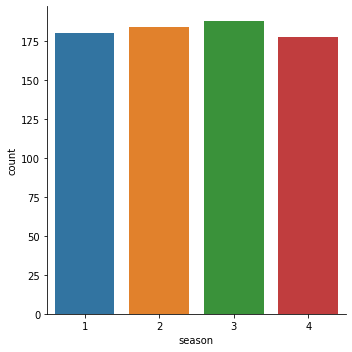

In [9]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
plt.show()

In [10]:
df.yr.value_counts()
# the dataset has equal amount of data for two years

0    365
1    365
Name: yr, dtype: int64

### year - summary

0: 2018 1: 2019

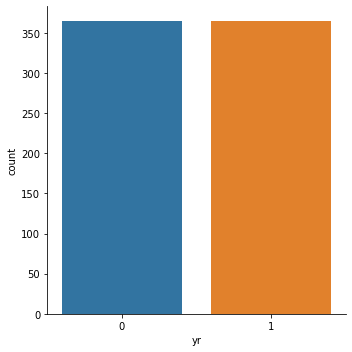

In [11]:
sns.factorplot(x='yr',data=df,kind='count',size=5,aspect=1)
plt.show()

In [12]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

here 1 - January, similarly 12 - December

In [13]:
df.holiday.value_counts()

# As per the department of human resources we can say that there are generally 11 public holidays per year 
# reference link: http://dchr.dc.gov/page/holiday-schedule

0    709
1     21
Name: holiday, dtype: int64

### Holiday Summary

0 - represents not a holiday 1 - represents its a holiday

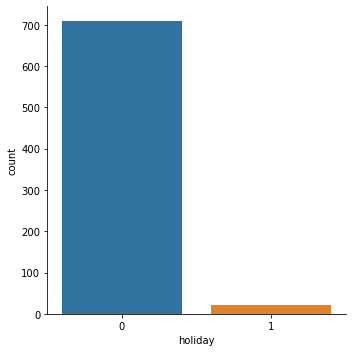

In [14]:
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) 
plt.show()
# majority of data is for non holiday days.

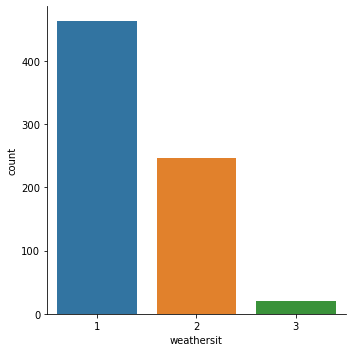

In [15]:
sns.factorplot(x='weathersit',data=df,kind='count',size=5,aspect=1)  
plt.show()
# 1-> Clear, Few clouds, Partly cloudy, Partly cloudy
# 2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3-> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Here we can see say that during the heavy rains, thunderstorms, Snog+Fog situations (option 4) the demande for bike shares has been Zero as the situations are not favourable for bike riding

In [17]:
# To check Missing Values in the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data Preparation
Observations from the Data Dictionary and Dataset:

1. Column 'instant' is record index

Action: Drop the column

2. Column 'dteday' is explained in 'yr' and 'mnth' columns

Action: Drop the column

In [18]:
#Keeping original dataset intact and dropping the Columns 'Instant' and 'dteday' in new dataframe.

df1=df.drop({'instant','dteday'},axis='columns')
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#Checking Correlation between temp and atemp as they look mostly similar

df1['temp'].corr(df1['atemp'])

0.9916961786905648

Since both the columns are highly correlated, We can drop one of them.

According to dataset, column 'temp' represents actual temperature while column 'atemp' is actual temperature what customer might feel. Since we are predicting customer response, It seems logical to keep 'atemp' than 'temp'

In [20]:
#Dropping the column 'temp'
df1=df1.drop({'temp'},axis='columns')
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,82,1518,1600


As it is a Prediction of Bike Rental Daily count, based on environmental and Seasonal settings, here the count of casual and registered users or classification based on kind of users is out of scope.

In [21]:
#dropping the Casual and Registered user counts columns frpm the dataset

df1=df1.drop({'casual','registered'},axis='columns')
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [22]:
# To see the column names of a dataset
df1.columns.unique()

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [24]:
# Renaming the columns for better readability & understanding

df1.rename(columns={
    'atemp':'Temperature',
    'season':'Season',
    'yr':'Year',
    'mnth':'Month',
    'holiday':'Holiday',
    'weekday':'Weekday',
    'workingday':'WorkingDay',
    'weathersit':'WeatherSituation',
    'hum':'Humidity',
    'windspeed':'Windspeed',
    'cnt':'Count'}, inplace=True)

In [25]:
df1.head()

,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSituation,Temperature,Humidity,Windspeed,Count
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [26]:
# lets check some basic statistical details like percentile, mean, std etc. ... of a dataset
df1.describe()

,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSituation,Temperature,Humidity,Windspeed,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


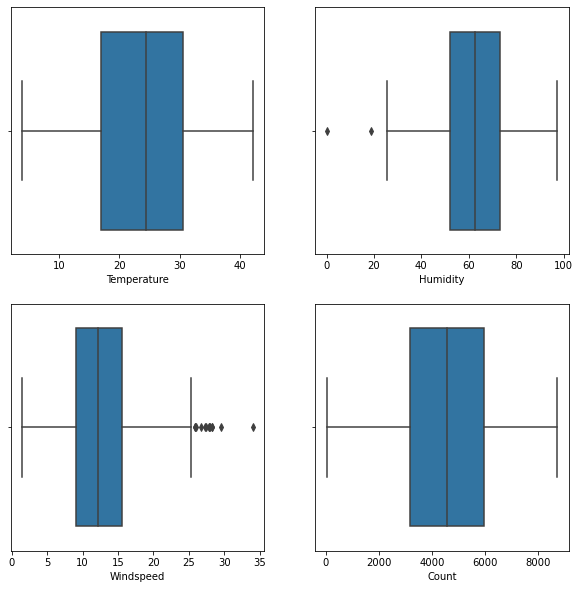

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df1['Temperature'])

plt.subplot(2,2,2)
sns.boxplot(df1['Humidity'])

plt.subplot(2,2,3)
sns.boxplot(df1['Windspeed'])

plt.subplot(2,2,4)
sns.boxplot(df1['Count'])

plt.show()

In [28]:
# In above graph, We can see that the Humidity is 0 in one of the case, Lets see what are the rows there.
df1[df1['Humidity']==0]

,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSituation,Temperature,Humidity,Windspeed,Count
68,1,0,3,0,6,0,3,19.2834,0.0,17.545759,623


According to the conditions of earth, Humidity can never be zero. Lets drop this row to ensure we normalise the humidity.

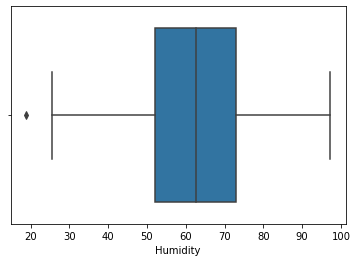

In [29]:
# Dropping the zero humidity row
df1=df1[~(df1['Humidity']==0)]
sns.boxplot(df1['Humidity'])
plt.show()

In [30]:
df1.shape

(729, 11)

In [31]:
#Check categorical columns & Continuous Columns in dataframe df
df1.nunique().sort_values()

Year                  2
Holiday               2
WorkingDay            2
WeatherSituation      3
Season                4
Weekday               7
Month                12
Humidity            593
Windspeed           648
Temperature         688
Count               694
dtype: int64

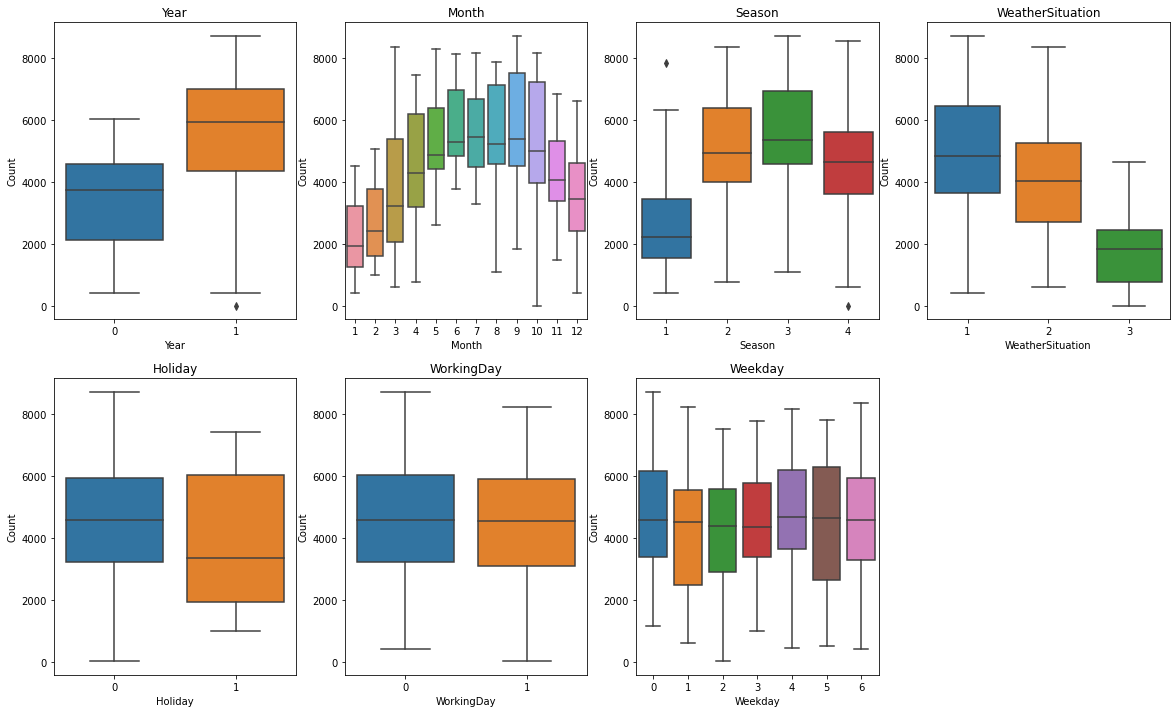

In [32]:
#Distribution of Categorical Variables
plt.figure(figsize=(20, 12))

features = ['Year','Month','Season','WeatherSituation','Holiday','WorkingDay','Weekday']

for i in enumerate(features):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(x = i[1], y = 'Count', data = df1)
    plt.title(i[1])

Observations from Boxplots of Categorical variables

1. Count of Rented Bikes is higher in 2019 than 2018
2. Lower Bike rent counts have been observed at the start and end of the year while between June and October, they are the highest.
3. Season Summer(2) and Fall(3) seem more favourable for bike rentals.
4. Weather Situation 1 and 2 seem far more favourable for bike rentals than 3.
5. Median count of Bike rentals on Holiday is less than non holidays.
6. Working Day seems to have not much impact on counts. the data seems to have equal distribution.
7. All weekedays seem to have almost equal medians.

Creating Dummmy Variables for Columns Month,Season, WeatherSituation and Weekday

In [33]:
#Creating dummies for Season

dummies=pd.get_dummies(df1['Season'], drop_first = True)
for i in dummies.columns:
    df1['Season'+'_'+str(i)]=dummies[i]
df1.drop(columns={'Season'},inplace=True)

#Creating Dummies for Weekday

dummies=pd.get_dummies(df1['Weekday'], drop_first = True)
for i in dummies.columns:
    df1['Weekday'+'_'+str(i)]=dummies[i]
df1.drop(columns={'Weekday'},inplace=True)

#Creating Dummies for WeatherSituation

dummies=pd.get_dummies(df1['WeatherSituation'], drop_first = True)
for i in dummies.columns:
    df1['WeatherSituation'+'_'+str(i)]=dummies[i]
df1.drop(columns={'WeatherSituation'},inplace=True)

#Creating Dummies for Month

dummies=pd.get_dummies(df1['Month'], drop_first = True)
for i in dummies.columns:
    df1['Month'+'_'+str(i)]=dummies[i]
df1.drop(columns={'Month'},inplace=True)

In [34]:
df1.shape

(729, 29)

In [35]:
df1.head()

,Year,Holiday,WorkingDay,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualising the Data

During this phase, We will try to check if any patterns can be visually interpreted. Understanding the correlation, dependancies through univariate, Bivariate or multivariate analysis helps us understand the data better. We can identify whether any of the predictive features have association with the outcome variable and Determine multicollinearity.

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Cnt`.

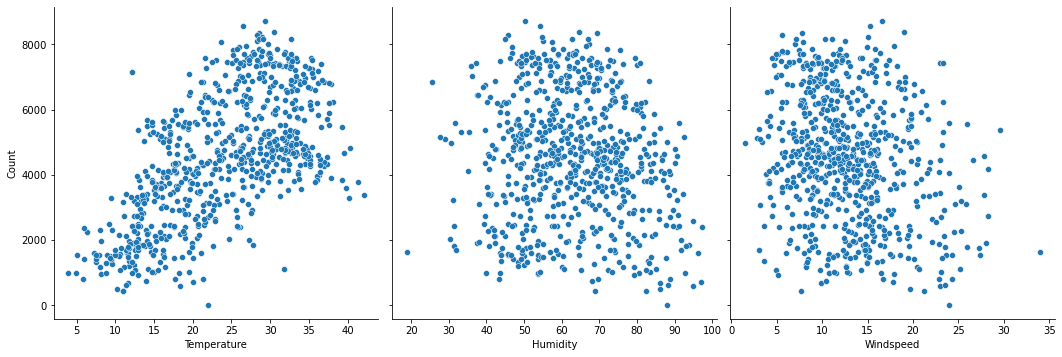

In [37]:
sns.pairplot(df1, x_vars=['Temperature', 'Humidity', 'Windspeed'], y_vars='Count',size=5, aspect=1, kind='scatter')
plt.show()

Looking at the correlation, we can clearly see that 

1. between Count and Temperature, seems like Higher temperatures lead to an increasing number of bike rents
    and lower temperatures decrease the number of rents.
2. For Humidity and Windspeed, Count seems to be distributed uniformly or without a pattern

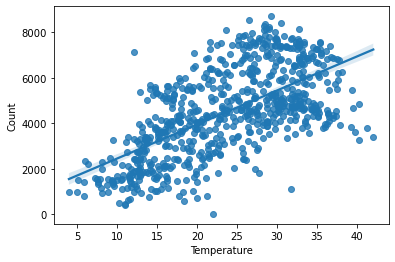

In [39]:
sns.regplot( x='Temperature', y='Count',data = df1)
plt.show()

Here we can see that the gradient line is increasing indicating a positive slope, so we can say that as the Tempature increases the sales of the bikes increases

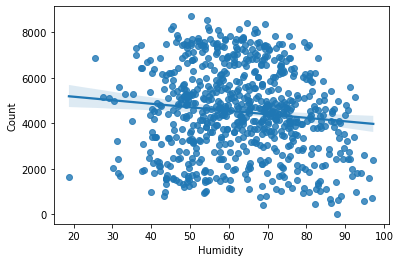

In [40]:
sns.regplot( x='Humidity', y='Count',data = df1)
plt.show()

Here we can see that the gradient line is descending  a little indicating a negative slope and there is no particular pattren
over here

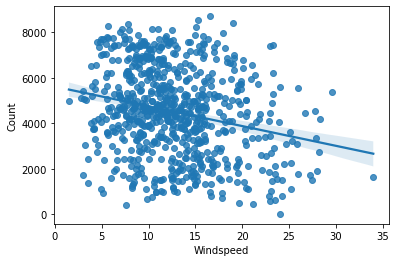

In [41]:
sns.regplot( x='Windspeed', y='Count',data = df1)
plt.show()

Here we can see that the gradient line is descending indicating a negative slope,
so we can say that as the windspeed increases the sales of the bikes decreases

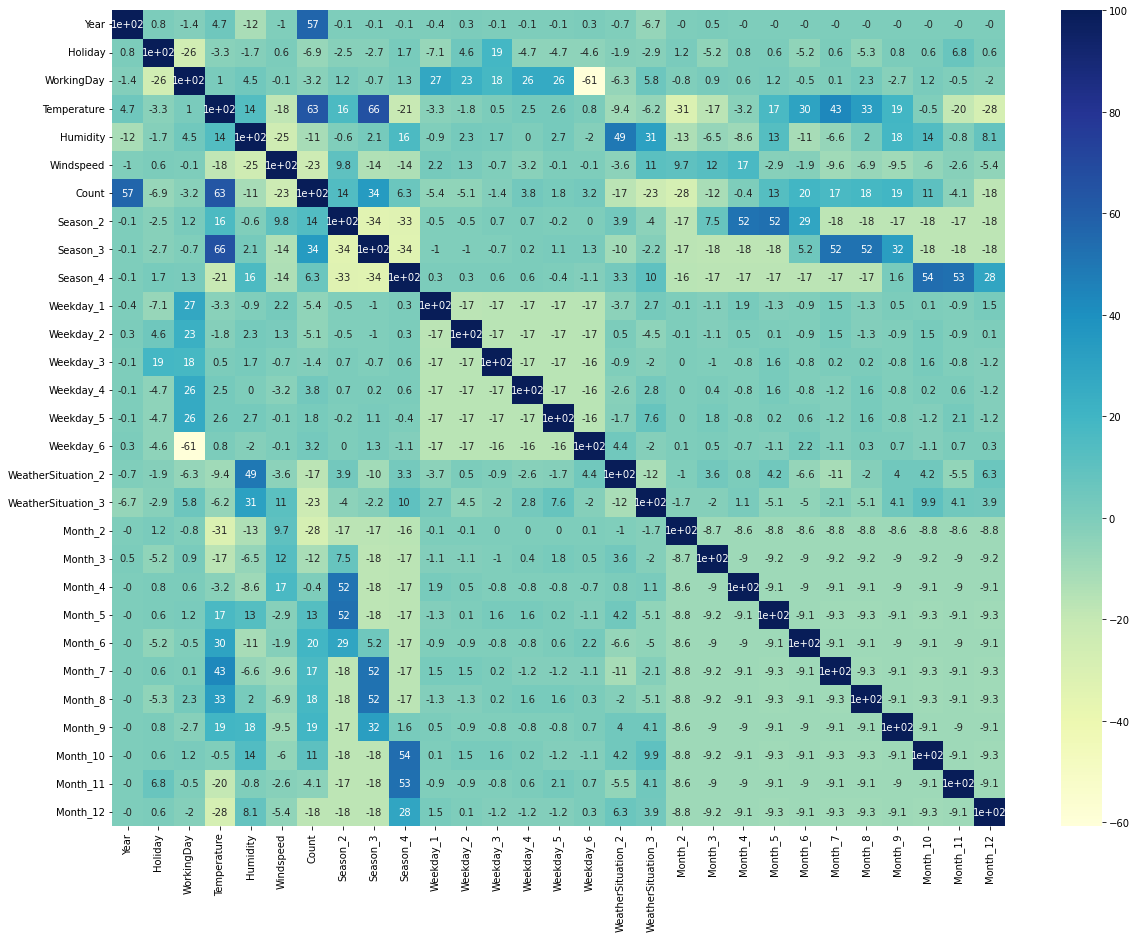

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 15))
sns.heatmap(round(df1.corr()*100,1), annot = True, cmap="YlGnBu")
# here we have multiplied with 100 to have an easy understanding of the correlated values
plt.show()

Observations from Heatmap:

1. We can see high correlations between different seasons for different Months. For example, Season_4 is correlated with Months 10,11,12.

2. Temperature is correlated with Count of Bikes being rented.

3. Temepeature is also correlated negatively for few months indicating lower temperature for those months and positively correlated for few months indicating higher temperatures

4. WorkingDay is negatively correlated to Weekday_6 which is Saturday

5. Different Weather Situations are correlated to Humidities.

6. Year is highly correlated with Count of bikes rented indicating 2019 has more rented bikes than 2018.

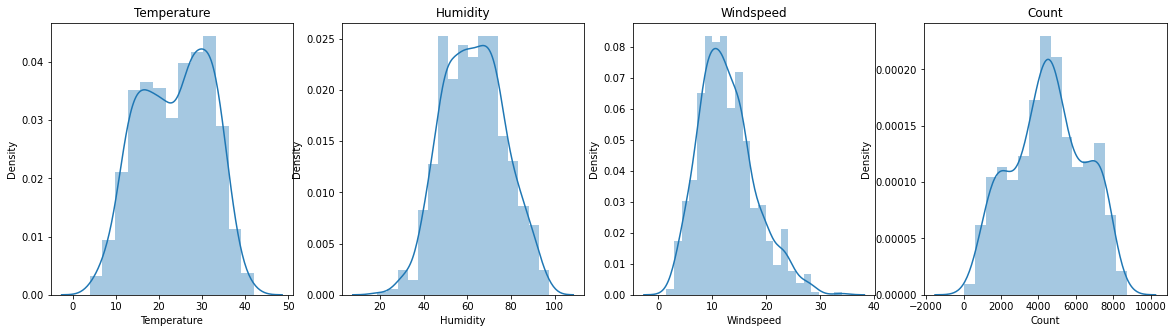

In [44]:
#Distribution of Numeric columns
plt.figure(figsize=(20, 5))

features = ['Temperature','Humidity','Windspeed','Count']

for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(df1[i[1]])
    plt.title(i[1])
plt.show()

All the Numeric columns seem to have data normally distributed. These columns can be modified for better results with the help of transform functions.

Note: Here we are not performing any transformation of the columns. 

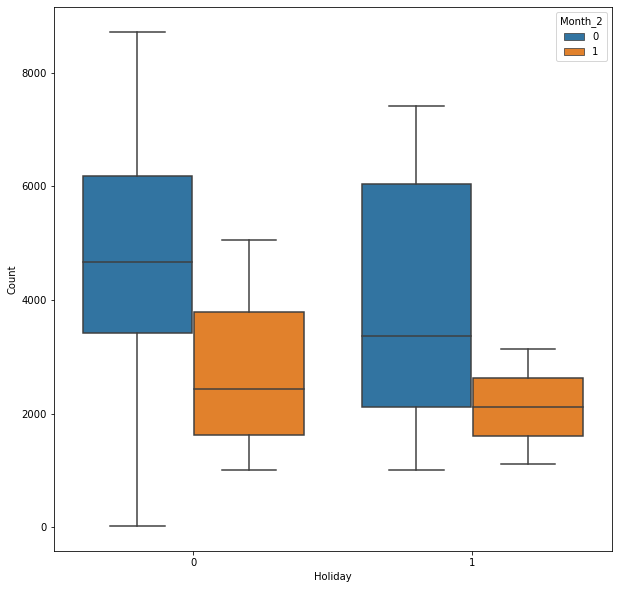

In [45]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Holiday', y = 'Count', hue = 'Month_2', data = df1)
plt.show()

# Performing Simple Linear Regression

Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 

- 𝑦  is the response
- 𝑐  is the intercept
- 𝑚1  is the coefficient for the first feature
- 𝑚𝑛  is the coefficient for the nth feature

In our case:

𝑦=𝑐+𝑚1×𝑇𝑉 
The  𝑚  values are called the model coefficients or model parameters.

### Generic Steps in model building
We first assign the feature variables like Temparature, Humidity etc in this case, to the variable X and the response variable, Count, to the variable y

In [47]:
# Dividing into X and Y sets for the model building

y=df1.Count
X=df1.drop('Count',axis=1)

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [52]:
Scaler=MinMaxScaler()

In [53]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
obj=Scaler.fit(X_train[['Temperature', 'Humidity','Windspeed']])
# temp, hum & Windspeed are the numerical variables
X_train[['Temperature', 'Humidity','Windspeed']]=obj.transform(X_train[['Temperature', 'Humidity','Windspeed']])

In [54]:
X_train.head()

,Year,Holiday,WorkingDay,Temperature,Humidity,Windspeed,Season_2,Season_3,Season_4,Weekday_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
626,1,0,1,0.635584,0.450242,0.371638,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
364,0,0,1,0.461603,0.552447,0.382342,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.460736,0.559440,0.255342,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.210280,0.381387,0.663106,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.411155,0.389456,0.188475,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
X_train.describe()

,Year,Holiday,WorkingDay,Temperature,Humidity,Windspeed,Season_2,Season_3,Season_4,Weekday_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.027451,0.688235,0.541209,0.571669,0.318011,0.243137,0.266667,0.247059,0.139216,...,0.094118,0.074510,0.090196,0.074510,0.080392,0.090196,0.088235,0.080392,0.082353,0.094118
std,0.500352,0.163554,0.463669,0.221255,0.182541,0.170567,0.429398,0.442651,0.431725,0.346511,...,0.292279,0.262857,0.286744,0.262857,0.272166,0.286744,0.283915,0.272166,0.275172,0.292279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357237,0.431818,0.192829,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552927,0.575578,0.296767,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.731274,0.704680,0.414082,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [56]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
# here we can change the number of featues to select as per the requirement
rfe = rfe.fit(X_train, y_train)

In [57]:
RFE=pd.DataFrame()
RFE['Feature']=X_train.columns
RFE['support']=rfe.support_
RFE['ranking']=rfe.ranking_
RFE.sort_values('ranking')

,Feature,support,ranking
0,Year,True,1
15,WeatherSituation_2,True,1
20,Month_5,True,1
23,Month_8,True,1
24,Month_9,True,1
25,Month_10,True,1
16,WeatherSituation_3,True,1
8,Season_4,True,1
6,Season_2,True,1
5,Windspeed,True,1


In [58]:
# To select the top 15 features which are true
col=list(RFE[RFE['ranking']==1].Feature.reset_index(drop=True))
col

['Year',
 'Holiday',
 'Temperature',
 'Humidity',
 'Windspeed',
 'Season_2',
 'Season_3',
 'Season_4',
 'WeatherSituation_2',
 'WeatherSituation_3',
 'Month_3',
 'Month_5',
 'Month_8',
 'Month_9',
 'Month_10']

Now that we have 15 top features after RFE, We will conduct Feature Selection One by one based on p-value and VIF

## Some Theory concepts to understand the feature selection

Two main statistics to select the features:

### p-value:
Hypothesis testing is that a feature is insignificant in the model and by having p-value less than 0.05, we reject this hypothesis and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we failed to reject the hypothesis that the feature is insignificant.

### VIFs:
When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 5 and we can eliminate those variables.



#### Strategies to be followed while selecting the features:

1. When a feature has high p-value and high VIF, then it can be dropped first.
2. When a feature has high p-value and low VIF, then we will drop it as it is not significant.
3. When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we will remove this feature and build the model and check the R-squared.
4. When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.



In [60]:
X_train.columns[~rfe.support_]

Index(['WorkingDay', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6', 'Month_2', 'Month_4', 'Month_6', 'Month_7',
       'Month_11', 'Month_12'],
      dtype='object')

### Model 1

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.33e-186
Time:                        13:25:54   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1729.3195    199

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,22.55
3,Humidity,12.75
6,Season_3,8.09
5,Season_2,3.71
4,Windspeed,3.35
7,Season_4,3.09
8,WeatherSituation_2,2.33
0,Year,2.07
11,Month_5,1.76
12,Month_8,1.75


From the above Summary statistics,

1. All the features are very significant with p-value being less than 0.05.
2. VIFs for few variables are very high which show collinearity.

As per our feature selection strategy, we will remove the Humidity column & rebuld the model again

In [64]:
X_train_new = X_train_rfe.drop(["Humidity"], axis = 1)

### Model 2

Rebuilding the model without Humidity

In [65]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.04e-181
Time:                        13:27:52   Log-Likelihood:                -4131.7
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     495   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1018.4490    153

### Inference :
In this model, We dont see a huge dip in the R-squared and Values of R-squared and Adj. R-squared got closer so this is a good elimination.

In [66]:
# Dropping the constant variable
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,15.26
5,Season_3,7.76
4,Season_2,3.64
3,Windspeed,3.26
6,Season_4,2.99
0,Year,2.07
10,Month_5,1.74
11,Month_8,1.74
13,Month_10,1.56
7,WeatherSituation_2,1.50


As per our feature selection strategy, we will remove the Season_3 column & rebuld the model again

In [67]:
X_train_new = X_train_rfe.drop(["Season_3", "Humidity"], axis = 1)

### Model 3
Rebuilding the model without Season_3

In [68]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.38e-179
Time:                        13:30:23   Log-Likelihood:                -4139.5
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     496   BIC:                             8366.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                923.3481    153

In [69]:
# Dropping the constant variable
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.23
3,Windspeed,3.16
4,Season_2,2.34
0,Year,2.04
5,Season_4,1.93
9,Month_5,1.68
12,Month_10,1.54
10,Month_8,1.51
6,WeatherSituation_2,1.49
11,Month_9,1.34


#### Inference:

In this model, We dont see a huge difference in R-squared while the VIFs of other variables like temperatures have decreased. Hence this is a good elimination.

### Model 4
Rebuilding the model without Month_5 as the P value is high

In [77]:
X_train_new = X_train_rfe.drop(["Month_5", "Humidity", "Season_3"], axis = 1)

In [78]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.22e-180
Time:                        13:32:58   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8306.
Df Residuals:                     497   BIC:                             8361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                923.0050    153

In [79]:
# Dropping the constant variable
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.13
3,Windspeed,3.14
0,Year,2.03
5,Season_4,1.93
4,Season_2,1.79
11,Month_10,1.54
9,Month_8,1.51
6,WeatherSituation_2,1.49
10,Month_9,1.34
8,Month_3,1.18


### Model 5
Rebuilding the model without Month_3 as the P value is high

In [80]:
X_train_new = X_train_rfe.drop(["Month_5", "Humidity", "Season_3", "Month_3"], axis = 1)

In [81]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.62e-181
Time:                        13:33:21   Log-Likelihood:                -4141.6
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     498   BIC:                             8358.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                981.6228    150

In [82]:
# Dropping the constant variable
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.12
3,Windspeed,2.96
0,Year,2.03
5,Season_4,1.90
4,Season_2,1.79
10,Month_10,1.54
8,Month_8,1.49
6,WeatherSituation_2,1.48
9,Month_9,1.33
7,WeatherSituation_3,1.06


### Model 6
Rebuilding the model without Month_10 as the P value is near to 0.5

In [83]:
X_train_new = X_train_rfe.drop(["Month_5", "Humidity", "Season_3", "Month_3", "Month_10"], axis = 1)

In [84]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.16e-181
Time:                        13:34:07   Log-Likelihood:                -4143.6
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     499   BIC:                             8356.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                950.0594    150

In [85]:
# Dropping the constant variable
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,4.99
3,Windspeed,2.95
0,Year,2.02
4,Season_2,1.77
6,WeatherSituation_2,1.48
8,Month_8,1.48
5,Season_4,1.46
9,Month_9,1.30
7,WeatherSituation_3,1.06
1,Holiday,1.03


### Model Evaluation of Train Dataset

#### Assumptions of Linear Regression:

Linear regression model is based on the following assumption and we will prove these assumptions with the model we built:

- Linear relationship between X and Y: This was proved in the pair plot
- Error terms are normally distributed
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity)

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_count = lm.predict(X_train_lm)

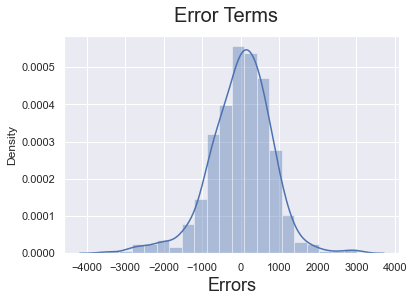

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Making Predictions
#### Applying the scaling on the test sets

In [90]:
#Testing the model using Test Dataset

In [91]:
Scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
obj=Scaler.fit(X_test[['Temperature', 'Humidity','Windspeed']])


X_test[['Temperature', 'Humidity','Windspeed']]=obj.transform(X_test[['Temperature', 'Humidity','Windspeed']])

In [92]:
X_test.head()

,Year,Holiday,WorkingDay,Temperature,Humidity,Windspeed,Season_2,Season_3,Season_4,Weekday_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
185,0,0,1,0.805193,0.440171,0.262609,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
639,1,0,1,0.597655,0.852259,0.207535,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
300,0,0,0,0.296437,0.433455,0.523587,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
222,0,0,0,0.744797,0.195971,0.360047,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
153,0,0,0,0.658028,0.094018,0.583362,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
X_test.describe()

,Year,Holiday,WorkingDay,Temperature,Humidity,Windspeed,Season_2,Season_3,Season_4,Weekday_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.698630,0.515059,0.488450,0.425817,0.273973,0.237443,0.237443,0.155251,...,0.059361,0.100457,0.073059,0.100457,0.095890,0.073059,0.068493,0.095890,0.082192,0.063927
std,0.500513,0.176306,0.459904,0.227664,0.203343,0.185614,0.447017,0.426491,0.426491,0.362974,...,0.236840,0.301297,0.260830,0.301297,0.295115,0.260830,0.253169,0.295115,0.275286,0.245183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311312,0.335776,0.301115,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.537188,0.472527,0.407263,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.686959,0.632851,0.521249,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
X_train_new.head()

,Year,Holiday,Temperature,Windspeed,Season_2,Season_4,WeatherSituation_2,WeatherSituation_3,Month_8,Month_9
626,1,0,0.635584,0.371638,0,0,0,0,0,1
364,0,0,0.461603,0.382342,0,0,0,0,0,0
426,1,0,0.460736,0.255342,0,0,1,0,0,0
728,1,0,0.210280,0.663106,0,0,0,0,0,0
482,1,0,0.411155,0.188475,1,0,1,0,0,0


In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

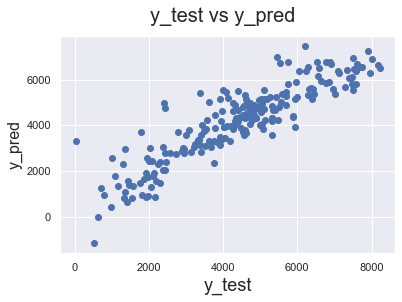

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ Count = 950.06 + 1989.56 \times Year - 626.92 \times Holiday + 4725.82 \times Temperature - 933.35 \times Windspeed + 804.78 \times Season_2 + 1132.47 \times Season_4 -665.41 \times WeatherSituation_2 - 2153.57 \times WeatherSituation_3 + 510.11 \times Month_8 + 993.15 \times Month_9 $

Overall we have a decent model, but we also acknowledge that we could do better.

In [98]:
# evaluate 
r2_score(y_true = y_test, y_pred = y_pred)

0.786729003403876

## Conclusion

In conclusion, for USA market, Data suggests the following remarks on demand of rental bikes:

1. Year on Year, The demand for the rental bikes is increasing which is a positive sign in the market.
2. Customers dont really prefer using Rental bikes on Holidays, So providing discounts or offers to the Customers to use rental bikes on Holidays can be used to attract more customers.
3. Customers prefer using rental bikes in higher temperatures. So, measures should be taken to attract customers during the days with lower temperatures also.
4. With higher windspeed, customers tend to not use rental bikes.
5. Summer and Winter seasons have been preferred by customers to use rental bikes
6. Weather Situations like Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are impacting the rental bike sales or business.
7. September has been found as the month in which customers are likely to use rental bikes more.